In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
import zipfile
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
from google.colab import drive
from tensorflow.keras.utils import plot_model

# Importing Datasets

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2022-08-20 16:50:54--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 74.125.200.128, 74.125.68.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   216MB/s    in 0.3s    

2022-08-20 16:50:55 (216 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# All images will be rescaled by 1./255
train_datagen1 = ImageDataGenerator(rescale=1./255)
val_datagen1 = ImageDataGenerator(rescale=1./255)

In [ ]:
base_dir1 = '/tmp/cats_and_dogs_filtered'
train_dir1 = os.path.join(base_dir1, 'train')
validation_dir1 = os.path.join(base_dir1, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir1, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir1, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir1, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir1, 'dogs')

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator1 = train_datagen1.flow_from_directory(
        train_dir1,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator1 = val_datagen1.flow_from_directory(
        validation_dir1,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 1000 images belonging to 2 classes.


In [ ]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.493.jpg', 'cat.987.jpg', 'cat.747.jpg', 'cat.671.jpg', 'cat.961.jpg', 'cat.560.jpg', 'cat.347.jpg', 'cat.842.jpg', 'cat.17.jpg', 'cat.724.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


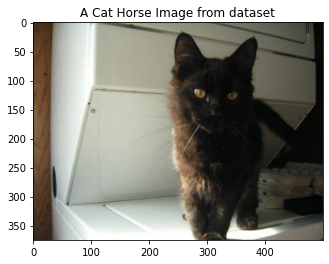

In [ ]:
plt.title("A Cat Horse Image from dataset")
plt.imshow(mpimg.imread(os.path.join(train_cats_dir, train_cat_fnames[0])))

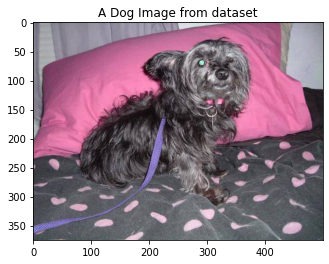

In [ ]:
plt.title("A Dog Image from dataset")
plt.imshow(mpimg.imread(os.path.join(train_dogs_dir, train_dog_fnames[0])))

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
local_zip2 = '/content/drive/MyDrive/archive.zip'
zip_ref2 = zipfile.ZipFile(local_zip2, 'r')
zip_ref2.extractall('/tmp/horse2zebra')
zip_ref2.close()

In [ ]:
! mkdir '/tmp/horse2zebra/train'
! mkdir '/tmp/horse2zebra/test'

In [ ]:
! mv '/tmp/horse2zebra/trainA' '/tmp/horse2zebra/train'
! mv '/tmp/horse2zebra/trainB' '/tmp/horse2zebra/train'

! mv '/tmp/horse2zebra/testA' '/tmp/horse2zebra/test'
! mv '/tmp/horse2zebra/testB' '/tmp/horse2zebra/test'

In [ ]:
base_dir2 = '/tmp/horse2zebra'
train_dir2 = os.path.join(base_dir2, 'train')
validation_dir2 = os.path.join(base_dir2, 'test')

# Directory with our training horse pictures
train_horse_dir = os.path.join(train_dir2, 'trainA')

# Directory with our training zebra pictures
train_zebra_dir = os.path.join(train_dir2, 'trainB')

# Directory with our validation horse pictures
validation_horse_dir = os.path.join(validation_dir2, 'testA')

# Directory with our validation zebra pictures
validation_zebra_dir = os.path.join(validation_dir2, 'testB')

In [ ]:
train_datagen2 = ImageDataGenerator(rescale=1./255)
val_datagen2 = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator2 = train_datagen2.flow_from_directory(
        train_dir2,  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 224x224
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

Found 2401 images belonging to 2 classes.


In [ ]:
# Flow validation images in batches of 20 using val_datagen generator
validation_generator2 = val_datagen2.flow_from_directory(
        validation_dir2,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 260 images belonging to 2 classes.


In [ ]:
train_horse_fnames = os.listdir(train_horse_dir)
print(train_horse_fnames[:10])

train_zebra_fnames = os.listdir(train_zebra_dir)
train_zebra_fnames.sort()
print(train_zebra_fnames[:10])

['n02381460_3363.jpg', 'n02381460_671.jpg', 'n02381460_1051.jpg', 'n02381460_1666.jpg', 'n02381460_3946.jpg', 'n02381460_1525.jpg', 'n02381460_1132.jpg', 'n02381460_5167.jpg', 'n02381460_2968.jpg', 'n02381460_1687.jpg']
['n02391049_10007.jpg', 'n02391049_10027.jpg', 'n02391049_1004.jpg', 'n02391049_10047.jpg', 'n02391049_10063.jpg', 'n02391049_101.jpg', 'n02391049_1012.jpg', 'n02391049_10122.jpg', 'n02391049_10123.jpg', 'n02391049_10129.jpg']


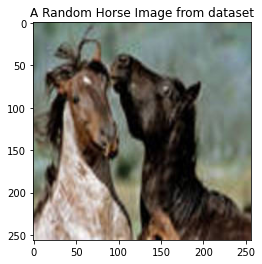

In [ ]:
plt.title("A Random Horse Image from dataset")
plt.imshow(mpimg.imread(os.path.join(train_horse_dir, train_horse_fnames[0])))

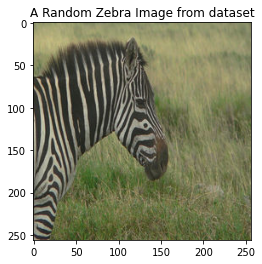

In [ ]:
plt.title("A Random Zebra Image from dataset")
plt.imshow(mpimg.imread(os.path.join(train_zebra_dir, train_zebra_fnames[0])))

# AlexNet

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 batch_normalization (BatchN  (None, 54, 54, 96)       384       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 256)       614656    
                                                                 
 batch_normalization_1 (Batc  (None, 26, 26, 256)      1024      
 hNormalization)                                                 
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

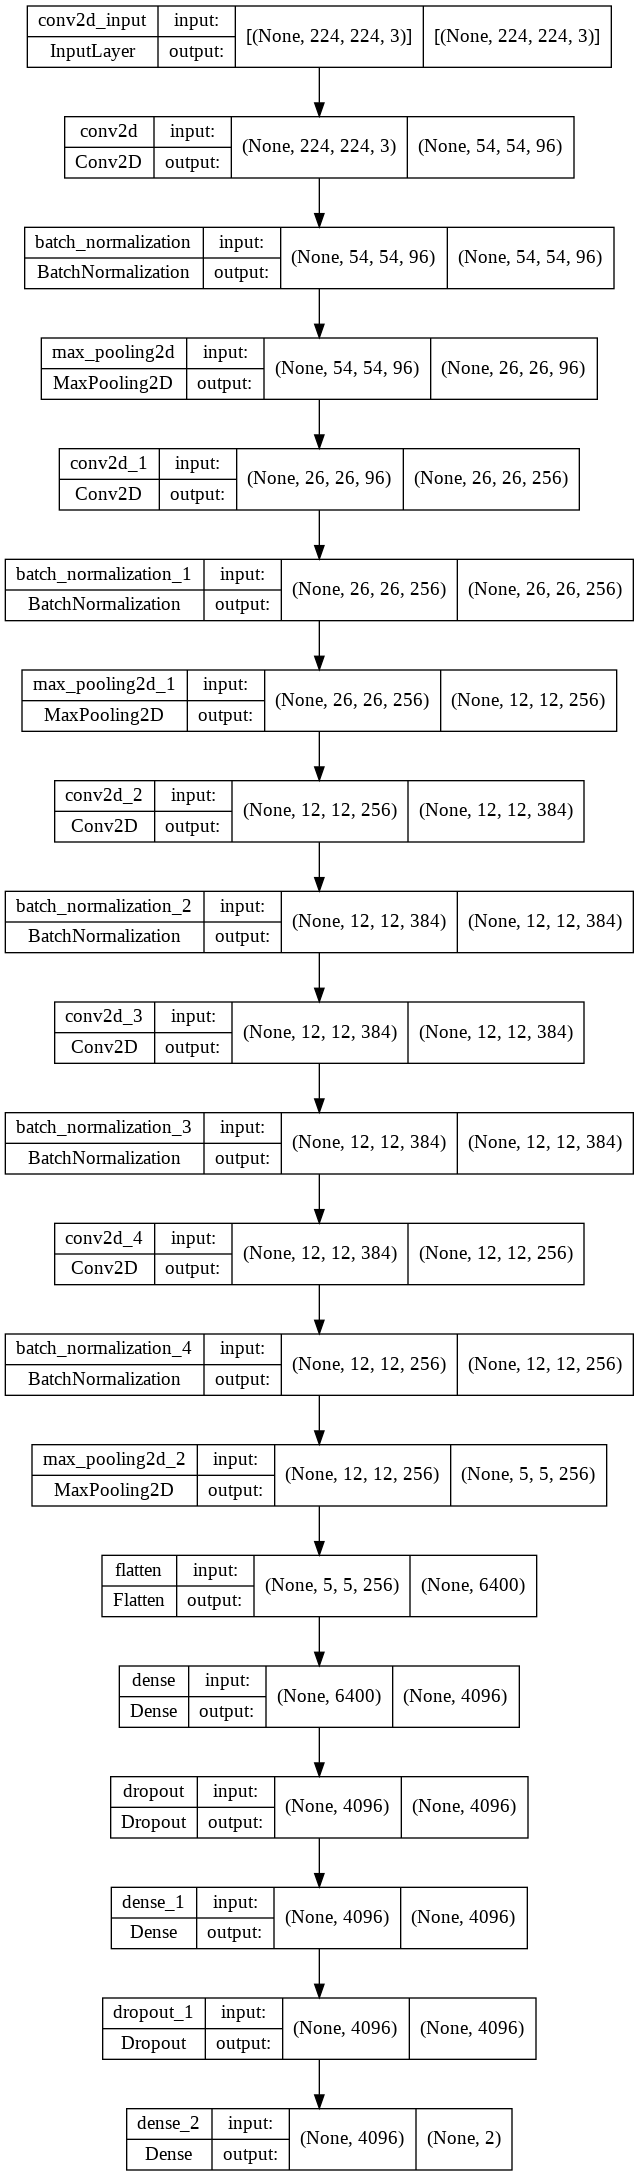

In [ ]:
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
historya = model.fit(
train_generator1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator1,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 24s 112ms/step - loss: 2.3305 - acc: 0.5570 - val_loss: 0.6734 - val_acc: 0.5870
Epoch 2/10
100/100 [==============================] - 11s 106ms/step - loss: 1.5244 - acc: 0.5830 - val_loss: 2.9203 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 11s 106ms/step - loss: 1.1437 - acc: 0.6080 - val_loss: 6.6164 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 12s 119ms/step - loss: 1.0347 - acc: 0.6325 - val_loss: 0.9208 - val_acc: 0.5620
Epoch 5/10
100/100 [==============================] - 10s 104ms/step - loss: 0.8171 - acc: 0.6845 - val_loss: 0.7473 - val_acc: 0.6300
Epoch 6/10
100/100 [==============================] - 10s 104ms/step - loss: 0.7449 - acc: 0.7155 - val_loss: 1.4939 - val_acc: 0.5620
Epoch 7/10
100/100 [==============================] - 10s 104ms/step - loss: 0.6684 - acc: 0.7180 - val_loss: 0.6239 - val_acc: 0.6800
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
historyb = model.fit(
train_generator2,
      steps_per_epoch=120,  # 2400 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator2,
      validation_steps=13,  # 260 images = batch_size * steps
      verbose=1)

Epoch 1/10
120/120 [==============================] - 9s 71ms/step - loss: 0.5864 - acc: 0.7698 - val_loss: 0.4250 - val_acc: 0.8269
Epoch 2/10
120/120 [==============================] - 8s 67ms/step - loss: 0.3233 - acc: 0.8664 - val_loss: 0.2378 - val_acc: 0.8808
Epoch 3/10
120/120 [==============================] - 8s 66ms/step - loss: 0.2570 - acc: 0.8942 - val_loss: 0.2074 - val_acc: 0.9000
Epoch 4/10
120/120 [==============================] - 8s 66ms/step - loss: 0.2147 - acc: 0.9168 - val_loss: 0.2083 - val_acc: 0.9115
Epoch 5/10
120/120 [==============================] - 8s 66ms/step - loss: 0.1931 - acc: 0.9236 - val_loss: 0.2818 - val_acc: 0.8769
Epoch 6/10
120/120 [==============================] - 8s 66ms/step - loss: 0.1977 - acc: 0.9202 - val_loss: 1.4618 - val_acc: 0.5538
Epoch 7/10
120/120 [==============================] - 8s 67ms/step - loss: 0.2038 - acc: 0.9223 - val_loss: 0.1991 - val_acc: 0.9192
Epoch 8/10
120/120 [==============================] - 8s 66ms/step - 

# VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
base_model1 = VGG16(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model1.trainable = False #freeze the layers
base_model1.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
model1 = tf.keras.Sequential([
    base_model1,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model1.summary()

model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


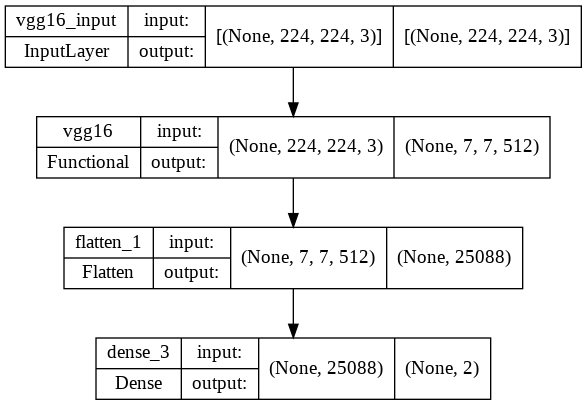

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model1,  show_shapes=True, show_layer_names=True)

In [ ]:
history1a = model1.fit(
train_generator1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator1,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 18s 178ms/step - loss: 0.3777 - acc: 0.8295 - val_loss: 0.3088 - val_acc: 0.8770
Epoch 2/10
100/100 [==============================] - 18s 179ms/step - loss: 0.2144 - acc: 0.9240 - val_loss: 0.2681 - val_acc: 0.8850
Epoch 3/10
100/100 [==============================] - 18s 175ms/step - loss: 0.1759 - acc: 0.9480 - val_loss: 0.2524 - val_acc: 0.8870
Epoch 4/10
100/100 [==============================] - 18s 177ms/step - loss: 0.1507 - acc: 0.9585 - val_loss: 0.2533 - val_acc: 0.8880
Epoch 5/10
100/100 [==============================] - 18s 180ms/step - loss: 0.1333 - acc: 0.9635 - val_loss: 0.2361 - val_acc: 0.9010
Epoch 6/10
100/100 [==============================] - 18s 181ms/step - loss: 0.1176 - acc: 0.9740 - val_loss: 0.2309 - val_acc: 0.9010
Epoch 7/10
100/100 [==============================] - 18s 181ms/step - loss: 0.1066 - acc: 0.9790 - val_loss: 0.2619 - val_acc: 0.8860
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
history1b = model1.fit(
train_generator2,
      steps_per_epoch=120,  # 2400 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator2,
      validation_steps=13,  # 260 images = batch_size * steps
      verbose=1)

Epoch 1/10
120/120 [==============================] - 16s 133ms/step - loss: 0.2643 - acc: 0.8916 - val_loss: 0.1701 - val_acc: 0.9423
Epoch 2/10
120/120 [==============================] - 16s 135ms/step - loss: 0.1203 - acc: 0.9572 - val_loss: 0.1458 - val_acc: 0.9538
Epoch 3/10
120/120 [==============================] - 16s 134ms/step - loss: 0.0975 - acc: 0.9727 - val_loss: 0.1502 - val_acc: 0.9462
Epoch 4/10
120/120 [==============================] - 16s 134ms/step - loss: 0.0836 - acc: 0.9748 - val_loss: 0.1270 - val_acc: 0.9577
Epoch 5/10
120/120 [==============================] - 16s 132ms/step - loss: 0.0702 - acc: 0.9824 - val_loss: 0.1197 - val_acc: 0.9615
Epoch 6/10
120/120 [==============================] - 16s 134ms/step - loss: 0.0621 - acc: 0.9849 - val_loss: 0.1155 - val_acc: 0.9692
Epoch 7/10
120/120 [==============================] - 16s 134ms/step - loss: 0.0589 - acc: 0.9836 - val_loss: 0.1111 - val_acc: 0.9692
Epoch 8/10
120/120 [==============================] - 1

# GoogleNet

In [ ]:
from tensorflow.keras.applications import InceptionV3
base_model2 = InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model2.trainable = False #freeze the layers
base_model2.summary()

87924736/87910968 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 111, 111, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_5 (BatchNo  (None, 111, 111, 32  96         ['conv2d_5[0][0]']               
 rmalization)         

In [ ]:
model2 = tf.keras.Sequential([
    base_model2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model2.summary()

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 2)                 102402    
                                                                 
Total params: 21,905,186
Trainable params: 102,402
Non-trainable params: 21,802,784
_________________________________________________________________


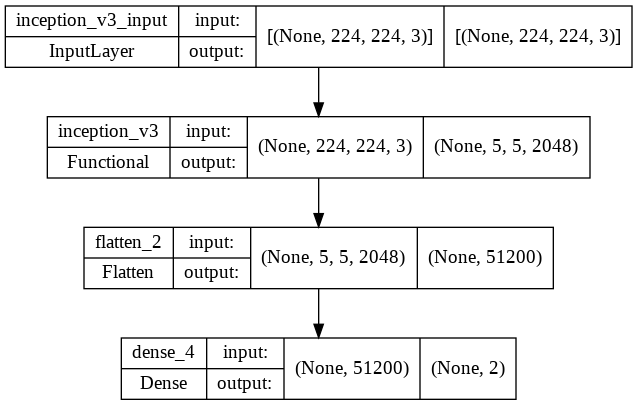

In [ ]:
plot_model(model2,  show_shapes=True, show_layer_names=True)

In [ ]:
history2a = model2.fit(
train_generator1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator1,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 18s 128ms/step - loss: 0.1274 - acc: 0.9565 - val_loss: 0.1145 - val_acc: 0.9700
Epoch 2/10
100/100 [==============================] - 12s 116ms/step - loss: 0.0115 - acc: 0.9975 - val_loss: 0.0627 - val_acc: 0.9820
Epoch 3/10
100/100 [==============================] - 12s 116ms/step - loss: 0.0020 - acc: 1.0000 - val_loss: 0.0590 - val_acc: 0.9830
Epoch 4/10
100/100 [==============================] - 12s 117ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0570 - val_acc: 0.9830
Epoch 5/10
100/100 [==============================] - 12s 116ms/step - loss: 8.6160e-04 - acc: 1.0000 - val_loss: 0.0558 - val_acc: 0.9820
Epoch 6/10
100/100 [==============================] - 13s 131ms/step - loss: 6.5066e-04 - acc: 1.0000 - val_loss: 0.0567 - val_acc: 0.9830
Epoch 7/10
100/100 [==============================] - 12s 115ms/step - loss: 5.4848e-04 - acc: 1.0000 - val_loss: 0.0565 - val_acc: 0.9830
Epoch 8/10
100/100 [=======================

In [ ]:
history2b = model2.fit(
train_generator2,
      steps_per_epoch=120,  # 2400 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator2,
      validation_steps=13,  # 260 images = batch_size * steps
      verbose=1)

Epoch 1/10
120/120 [==============================] - 10s 79ms/step - loss: 0.1266 - acc: 0.9702 - val_loss: 0.0733 - val_acc: 0.9808
Epoch 2/10
120/120 [==============================] - 9s 74ms/step - loss: 0.0136 - acc: 0.9954 - val_loss: 0.0907 - val_acc: 0.9769
Epoch 3/10
120/120 [==============================] - 9s 75ms/step - loss: 0.0037 - acc: 0.9979 - val_loss: 0.0965 - val_acc: 0.9808
Epoch 4/10
120/120 [==============================] - 9s 76ms/step - loss: 6.3443e-04 - acc: 1.0000 - val_loss: 0.1047 - val_acc: 0.9808
Epoch 5/10
120/120 [==============================] - 9s 72ms/step - loss: 7.6906e-05 - acc: 1.0000 - val_loss: 0.1020 - val_acc: 0.9808
Epoch 6/10
120/120 [==============================] - 9s 71ms/step - loss: 5.9434e-05 - acc: 1.0000 - val_loss: 0.1010 - val_acc: 0.9808
Epoch 7/10
120/120 [==============================] - 9s 71ms/step - loss: 6.0928e-05 - acc: 1.0000 - val_loss: 0.1028 - val_acc: 0.9808
Epoch 8/10
120/120 [==============================] 

# ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model3 = ResNet50(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model3.trainable = False #freeze the layers
base_model3.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [ ]:
import tensorflow as tf
model3 = tf.keras.Sequential([
    base_model3,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model3.summary()

model3.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 dense_5 (Dense)             (None, 2)                 200706    
                                                                 
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


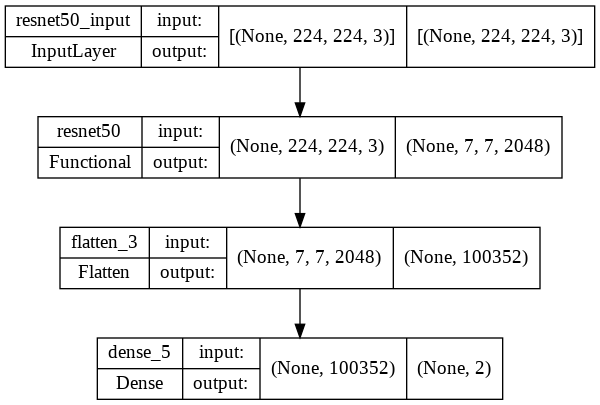

In [ ]:
plot_model(model3,  show_shapes=True, show_layer_names=True)

In [ ]:
history3a = model3.fit(
train_generator1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator1,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 17s 137ms/step - loss: 0.7126 - acc: 0.5690 - val_loss: 0.6429 - val_acc: 0.6400
Epoch 2/10
100/100 [==============================] - 13s 127ms/step - loss: 0.6582 - acc: 0.6190 - val_loss: 0.6503 - val_acc: 0.6050
Epoch 3/10
100/100 [==============================] - 14s 136ms/step - loss: 0.6530 - acc: 0.6305 - val_loss: 0.6289 - val_acc: 0.6360
Epoch 4/10
100/100 [==============================] - 13s 127ms/step - loss: 0.6027 - acc: 0.6680 - val_loss: 0.6224 - val_acc: 0.6640
Epoch 5/10
100/100 [==============================] - 13s 127ms/step - loss: 0.5889 - acc: 0.6780 - val_loss: 0.6561 - val_acc: 0.6170
Epoch 6/10
100/100 [==============================] - 13s 127ms/step - loss: 0.5991 - acc: 0.6865 - val_loss: 0.6140 - val_acc: 0.6620
Epoch 7/10
100/100 [==============================] - 13s 127ms/step - loss: 0.5736 - acc: 0.6960 - val_loss: 0.6064 - val_acc: 0.6740
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
history3b = model3.fit(
train_generator2,
      steps_per_epoch=120,  # 2400 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator2,
      validation_steps=13,  # 260 images = batch_size * steps
      verbose=1)

Epoch 1/10
120/120 [==============================] - 11s 91ms/step - loss: 0.5621 - acc: 0.7152 - val_loss: 0.4523 - val_acc: 0.7654
Epoch 2/10
120/120 [==============================] - 10s 87ms/step - loss: 0.4494 - acc: 0.7837 - val_loss: 0.3693 - val_acc: 0.8269
Epoch 3/10
120/120 [==============================] - 11s 93ms/step - loss: 0.3926 - acc: 0.8144 - val_loss: 0.3488 - val_acc: 0.8346
Epoch 4/10
120/120 [==============================] - 10s 87ms/step - loss: 0.3506 - acc: 0.8467 - val_loss: 0.3296 - val_acc: 0.8538
Epoch 5/10
120/120 [==============================] - 11s 87ms/step - loss: 0.3335 - acc: 0.8572 - val_loss: 0.3225 - val_acc: 0.8538
Epoch 6/10
120/120 [==============================] - 11s 87ms/step - loss: 0.3138 - acc: 0.8681 - val_loss: 0.3613 - val_acc: 0.8346
Epoch 7/10
120/120 [==============================] - 10s 87ms/step - loss: 0.3042 - acc: 0.8736 - val_loss: 0.3064 - val_acc: 0.8577
Epoch 8/10
120/120 [==============================] - 10s 87ms

# EfficientNetB0

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0
base_model4 = EfficientNetB0(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model4.trainable = False #freeze the layers
base_model4.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_4[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (Zero

In [ ]:
model4 = tf.keras.Sequential([
    base_model4,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model4.summary()

model4.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 flatten_4 (Flatten)         (None, 62720)             0         
                                                                 
 dense_6 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 4,175,013
Trainable params: 125,442
Non-trainable params: 4,049,571
_________________________________________________________________


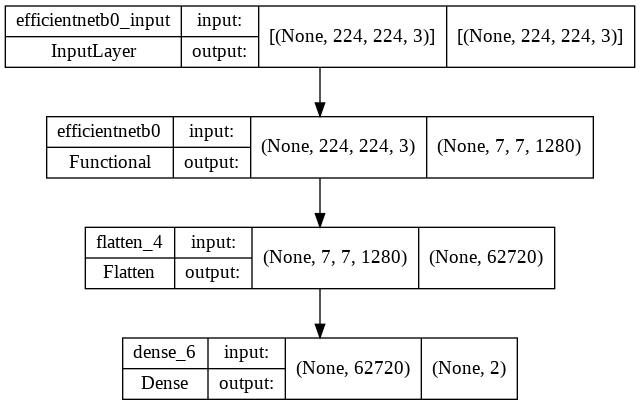

In [ ]:
plot_model(model4,  show_shapes=True, show_layer_names=True)

In [ ]:
history4a = model4.fit(
train_generator1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator1,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 18s 124ms/step - loss: 0.7498 - acc: 0.5130 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 11s 111ms/step - loss: 0.7597 - acc: 0.5260 - val_loss: 0.6934 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 11s 113ms/step - loss: 0.7329 - acc: 0.5000 - val_loss: 0.8268 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 11s 112ms/step - loss: 0.7749 - acc: 0.4930 - val_loss: 0.8153 - val_acc: 0.5000
Epoch 5/10
100/100 [==============================] - 11s 111ms/step - loss: 0.7825 - acc: 0.5020 - val_loss: 1.0246 - val_acc: 0.5000
Epoch 6/10
100/100 [==============================] - 11s 112ms/step - loss: 0.7402 - acc: 0.5110 - val_loss: 0.6947 - val_acc: 0.5000
Epoch 7/10
100/100 [==============================] - 11s 111ms/step - loss: 0.7329 - acc: 0.4950 - val_loss: 0.6949 - val_acc: 0.5000
Epoch 8/10
100/100 [==============================] - 1

In [ ]:
history4b = model4.fit(
train_generator2,
      steps_per_epoch=120,  # 2400 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator2,
      validation_steps=13,  # 260 images = batch_size * steps
      verbose=1)

Epoch 1/10
120/120 [==============================] - 9s 72ms/step - loss: 0.7326 - acc: 0.5191 - val_loss: 0.8909 - val_acc: 0.4615
Epoch 2/10
120/120 [==============================] - 8s 69ms/step - loss: 0.7455 - acc: 0.5048 - val_loss: 0.6848 - val_acc: 0.4962
Epoch 3/10
120/120 [==============================] - 8s 69ms/step - loss: 0.7108 - acc: 0.5523 - val_loss: 0.6659 - val_acc: 0.6000
Epoch 4/10
120/120 [==============================] - 8s 69ms/step - loss: 0.7328 - acc: 0.5414 - val_loss: 0.8540 - val_acc: 0.5385
Epoch 5/10
120/120 [==============================] - 8s 68ms/step - loss: 0.7109 - acc: 0.5401 - val_loss: 0.7041 - val_acc: 0.5385
Epoch 6/10
120/120 [==============================] - 8s 68ms/step - loss: 0.7130 - acc: 0.5598 - val_loss: 0.6809 - val_acc: 0.5385
Epoch 7/10
120/120 [==============================] - 8s 68ms/step - loss: 0.6882 - acc: 0.5792 - val_loss: 0.8255 - val_acc: 0.4615
Epoch 8/10
120/120 [==============================] - 8s 69ms/step - 

# MobileNetV2

In [ ]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
base_model5 = MobileNetV2(input_shape=(224,224,3), weights='imagenet', include_top=False)
base_model5.trainable = False #freeze the layers
base_model5.summary()

9420800/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

In [ ]:
model5 = tf.keras.Sequential([
    base_model5,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
model5.summary()

model5.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), metrics = ['acc'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten_5 (Flatten)         (None, 62720)             0         
                                                                 
 dense_7 (Dense)             (None, 2)                 125442    
                                                                 
Total params: 2,383,426
Trainable params: 125,442
Non-trainable params: 2,257,984
_________________________________________________________________


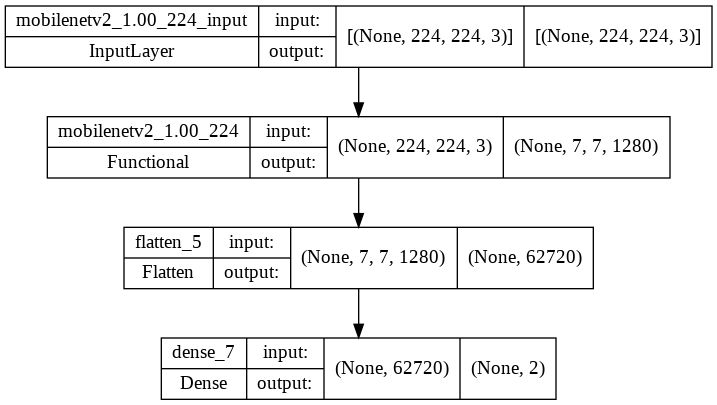

In [ ]:
plot_model(model5,  show_shapes=True, show_layer_names=True)

In [ ]:
history5a = model5.fit(
train_generator1,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator1,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=1)

Epoch 1/10
100/100 [==============================] - 14s 113ms/step - loss: 0.1404 - acc: 0.9565 - val_loss: 0.0743 - val_acc: 0.9800
Epoch 2/10
100/100 [==============================] - 11s 108ms/step - loss: 0.0127 - acc: 0.9945 - val_loss: 0.0860 - val_acc: 0.9780
Epoch 3/10
100/100 [==============================] - 11s 112ms/step - loss: 0.0038 - acc: 0.9990 - val_loss: 0.0831 - val_acc: 0.9820
Epoch 4/10
100/100 [==============================] - 11s 105ms/step - loss: 6.5320e-04 - acc: 1.0000 - val_loss: 0.0846 - val_acc: 0.9800
Epoch 5/10
100/100 [==============================] - 13s 127ms/step - loss: 4.1133e-04 - acc: 1.0000 - val_loss: 0.0843 - val_acc: 0.9810
Epoch 6/10
100/100 [==============================] - 12s 116ms/step - loss: 3.3328e-04 - acc: 1.0000 - val_loss: 0.0845 - val_acc: 0.9800
Epoch 7/10
100/100 [==============================] - 11s 107ms/step - loss: 2.8092e-04 - acc: 1.0000 - val_loss: 0.0846 - val_acc: 0.9810
Epoch 8/10
100/100 [===================

In [ ]:
history5b = model5.fit(
train_generator2,
      steps_per_epoch=120,  # 2400 images = batch_size * steps
      epochs=10,
      validation_data=validation_generator2,
      validation_steps=13,  # 260 images = batch_size * steps
      verbose=1)

Epoch 1/10
120/120 [==============================] - 8s 64ms/step - loss: 0.1635 - acc: 0.9685 - val_loss: 0.1739 - val_acc: 0.9846
Epoch 2/10
120/120 [==============================] - 8s 63ms/step - loss: 0.0151 - acc: 0.9941 - val_loss: 0.1717 - val_acc: 0.9846
Epoch 3/10
120/120 [==============================] - 8s 64ms/step - loss: 0.0031 - acc: 0.9987 - val_loss: 0.1830 - val_acc: 0.9846
Epoch 4/10
120/120 [==============================] - 8s 63ms/step - loss: 1.4256e-05 - acc: 1.0000 - val_loss: 0.1667 - val_acc: 0.9846
Epoch 5/10
120/120 [==============================] - 8s 63ms/step - loss: 1.0672e-05 - acc: 1.0000 - val_loss: 0.1680 - val_acc: 0.9846
Epoch 6/10
120/120 [==============================] - 8s 63ms/step - loss: 8.7891e-06 - acc: 1.0000 - val_loss: 0.1693 - val_acc: 0.9846
Epoch 7/10
120/120 [==============================] - 8s 64ms/step - loss: 7.7399e-06 - acc: 1.0000 - val_loss: 0.1701 - val_acc: 0.9846
Epoch 8/10
120/120 [==============================] -

# Performance Comparison

In [ ]:
ep = np.arange(1,11)

acca = historya.history['acc']
val_acca = historya.history['val_acc']
lossa = historya.history['loss']
val_lossa = historya.history['val_loss']

acc1a = history1a.history['acc']
val_acc1a = history1a.history['val_acc']
loss1a = history1a.history['loss']
val_loss1a = history1a.history['val_loss']

acc2a = history2a.history['acc']
val_acc2a = history2a.history['val_acc']
loss2a = history2a.history['loss']
val_loss2a = history2a.history['val_loss']

acc3a = history3a.history['acc']
val_acc3a = history3a.history['val_acc']
loss3a = history3a.history['loss']
val_loss3a = history3a.history['val_loss']

acc4a = history4a.history['acc']
val_acc4a = history4a.history['val_acc']
loss4a = history4a.history['loss']
val_loss4a = history4a.history['val_loss']

acc5a = history5a.history['acc']
val_acc5a = history5a.history['val_acc']
loss5a = history5a.history['loss']
val_loss5a = history5a.history['val_loss']

Cats & Dogs Dataset
Accuracy vs Validation Accuracy


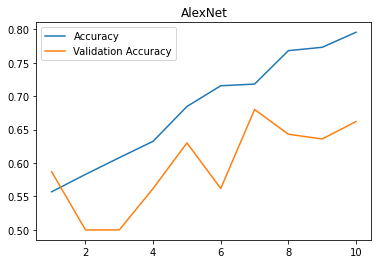

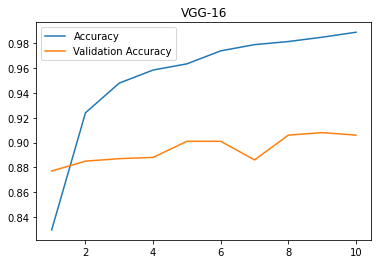

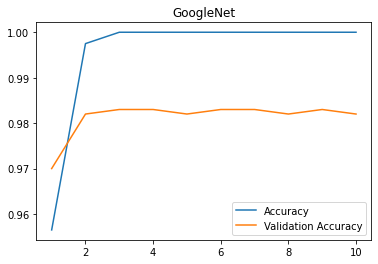

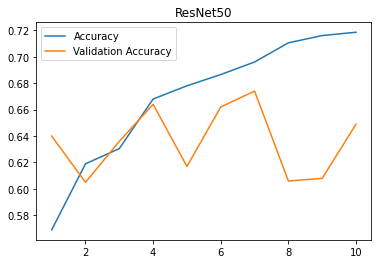

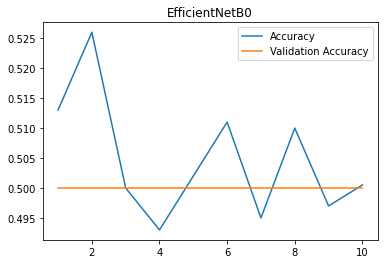

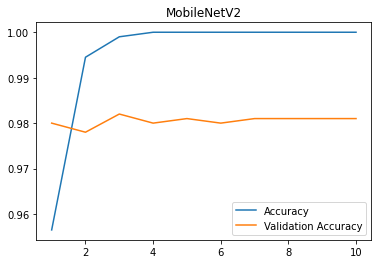

In [ ]:
print("Cats & Dogs Dataset")
print("Accuracy vs Validation Accuracy")
plt.title("AlexNet")
sns.lineplot(x=ep,y = acca)
sns.lineplot(x=ep,y = val_acca)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("VGG-16")
sns.lineplot(x=ep,y = acc1a)
sns.lineplot(x=ep,y = val_acc1a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("GoogleNet")
sns.lineplot(x=ep,y = acc2a)
sns.lineplot(x=ep,y = val_acc2a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("ResNet50")
sns.lineplot(x=ep,y = acc3a)
sns.lineplot(x=ep,y = val_acc3a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("EfficientNetB0")
sns.lineplot(x=ep,y = acc4a)
sns.lineplot(x=ep,y = val_acc4a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("MobileNetV2")
sns.lineplot(x=ep,y = acc5a)
sns.lineplot(x=ep,y = val_acc5a)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()

In [ ]:
ep = np.arange(1,11)

accb = historyb.history['acc']
val_accb = historyb.history['val_acc']
lossb = historyb.history['loss']
val_lossb = historyb.history['val_loss']

acc1b = history1b.history['acc']
val_acc1b = history1b.history['val_acc']
loss1b = history1b.history['loss']
val_loss1b = history1b.history['val_loss']

acc2b = history2b.history['acc']
val_acc2b = history2b.history['val_acc']
loss2b = history2b.history['loss']
val_loss2b = history2b.history['val_loss']

acc3b = history3b.history['acc']
val_acc3b = history3b.history['val_acc']
loss3b = history3b.history['loss']
val_loss3b = history3b.history['val_loss']

acc4b = history4b.history['acc']
val_acc4b = history4b.history['val_acc']
loss4b = history4b.history['loss']
val_loss4b = history4b.history['val_loss']

acc5b = history5b.history['acc']
val_acc5b = history5b.history['val_acc']
loss5b = history5b.history['loss']
val_loss5b = history5b.history['val_loss']

Horse2Zebra Dataset
Accuracy vs Validation Accuracy


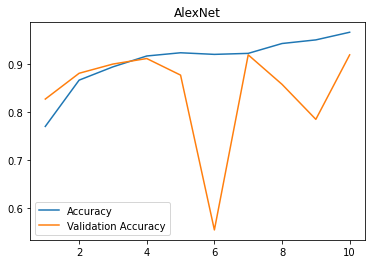

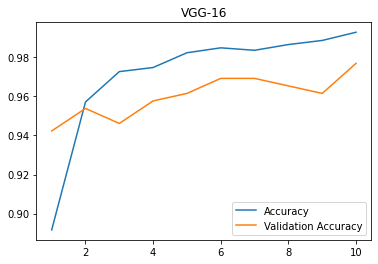

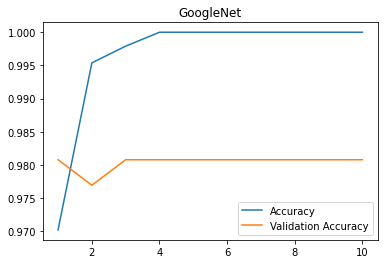

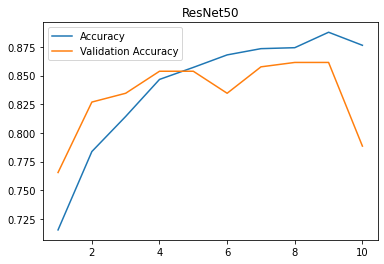

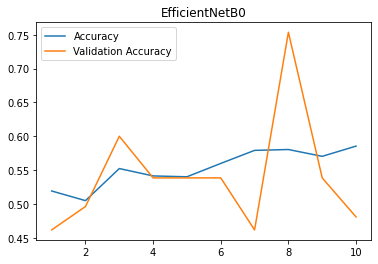

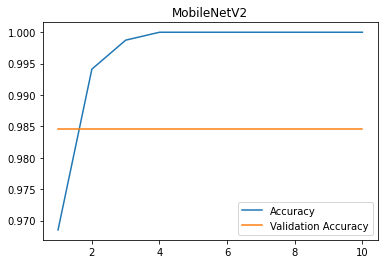

In [ ]:
print("Horse2Zebra Dataset")
print("Accuracy vs Validation Accuracy")
plt.title("AlexNet")
sns.lineplot(x=ep,y = accb)
sns.lineplot(x=ep,y = val_accb)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("VGG-16")
sns.lineplot(x=ep,y = acc1b)
sns.lineplot(x=ep,y = val_acc1b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("GoogleNet")
sns.lineplot(x=ep,y = acc2b)
sns.lineplot(x=ep,y = val_acc2b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("ResNet50")
sns.lineplot(x=ep,y = acc3b)
sns.lineplot(x=ep,y = val_acc3b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("EfficientNetB0")
sns.lineplot(x=ep,y = acc4b)
sns.lineplot(x=ep,y = val_acc4b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()
plt.title("MobileNetV2")
sns.lineplot(x=ep,y = acc5b)
sns.lineplot(x=ep,y = val_acc5b)
plt.legend(["Accuracy", "Validation Accuracy"])
plt.show()